In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_feature = pd.read_csv("train_features.csv")
train_target = pd.read_csv("train_salaries.csv")
test_feature = pd.read_csv("test_features.csv")

In [4]:
train_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
train_target.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
test_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


Let's look at the count of each dataframe

In [7]:
train_feature.shape

(1000000, 8)

In [8]:
train_target.shape

(1000000, 2)

In [9]:
test_feature.shape

(1000000, 8)

In [10]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [11]:
train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [12]:
test_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [13]:
train_feature.isna().mean()/len(train_feature)

jobId                  0.0
companyId              0.0
jobType                0.0
degree                 0.0
major                  0.0
industry               0.0
yearsExperience        0.0
milesFromMetropolis    0.0
dtype: float64

No missing values in the train dataset

In [14]:
train_target.isna().mean()/len(train_target)

jobId     0.0
salary    0.0
dtype: float64

No missing values in the target dataset

In [15]:
#merge the feature and target dataset
train = pd.merge(train_feature,train_target,on="jobId")

In [16]:
train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [17]:
train.jobType.unique()

array(['CFO', 'CEO', 'VICE_PRESIDENT', 'MANAGER', 'JUNIOR', 'JANITOR',
       'CTO', 'SENIOR'], dtype=object)

In [18]:
train.degree.unique()

array(['MASTERS', 'HIGH_SCHOOL', 'DOCTORAL', 'BACHELORS', 'NONE'],
      dtype=object)

In [19]:
stat = train.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))
# you can visit here Khan academy to brush up  on IQR. PS - I did!

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


In [20]:
train[train.salary<8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [21]:
train[train.salary>220.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [22]:
train.loc[train.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [23]:
train[(train.salary > 222.5) & (train.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


In [24]:
train = train[train.salary>8.5]

In [25]:
train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [26]:
train.shape

(999995, 9)

In [27]:
train.milesFromMetropolis.describe()

count    999995.000000
mean         49.529381
std          28.877721
min           0.000000
25%          25.000000
50%          50.000000
75%          75.000000
max          99.000000
Name: milesFromMetropolis, dtype: float64

In [28]:
train_cat = train.select_dtypes(include=['object','category'])
train_cat.head()

,jobId,companyId,jobType,degree,major,industry
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE


In [29]:
train.degree.unique()

array(['MASTERS', 'HIGH_SCHOOL', 'DOCTORAL', 'BACHELORS', 'NONE'],
      dtype=object)

In [30]:
def mean_salary(df,x1,x2):
    ms = df.loc[df[x1]==x2]
    return ms["salary"].mean()

In [31]:
mean_salary(train,"degree","MASTERS")

130.50564713935316

In [32]:
mean_salary(train,"degree","HIGH_SCHOOL")

101.92108450258466

In [33]:
mean_salary(train,"degree","DOCTORAL")

135.49097866128352

In [34]:
mean_salary(train,"degree","BACHELORS")

125.45466252599789

In [35]:
mean_salary(train,"degree","NONE")

98.17688186343428

In general we now know that people with Doctoral degree type make higher salaries. We had established this during our EDA as well. Now lets try to ordinal encode this.

In [36]:
degree_map = {'NONE': 1, 'HIGH_SCHOOL': 2, 'BACHELORS': 3, 'MASTERS': 4,'DOCTORAL':5}

train['degree_OE'] = train['degree'].map(degree_map)

In [37]:
train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,degree_OE
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,4
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,2
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,5
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,5
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,3


In [38]:
test_feature["degree_OE"] = test_feature["degree"].map(degree_map)

In [39]:
test_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,degree_OE
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,2
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,1
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,4
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,2
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,5


In [40]:
train.industry.unique()

array(['HEALTH', 'WEB', 'AUTO', 'FINANCE', 'EDUCATION', 'OIL', 'SERVICE'],
      dtype=object)

From basic EDA we know that Oil industry makes the highest salary, followed by 

In [41]:
train.industry.value_counts().sort_values(ascending=False).head(10)

WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

In [42]:
industry_map = {'EDUCATION': 1, 'SERVICE': 2, 'AUTO': 3, 'HEALTH': 4,'WEB':5,'FINANCE':6,'OIL':7}

train['industry_OE'] = train['industry'].map(industry_map)

In [43]:
train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,degree_OE,industry_OE
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,4,4
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,2,5
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,5,4
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,5,3
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,3,6


In [44]:
test_feature["industry_OE"] = test_feature["industry"].map(industry_map)

In [45]:
test_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,degree_OE,industry_OE
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,2,4
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,1,3
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,4,4
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,2,7
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,5,7


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
 8   salary               999995 non-null  int64 
 9   degree_OE            999995 non-null  int64 
 10  industry_OE          999995 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 91.6+ MB


In [47]:
train.major.unique()

array(['MATH', 'NONE', 'PHYSICS', 'CHEMISTRY', 'COMPSCI', 'BIOLOGY',
       'LITERATURE', 'BUSINESS', 'ENGINEERING'], dtype=object)

In [48]:
train = pd.get_dummies(train,prefix=["Major"],columns=["major"])

In [49]:
train.head()

,jobId,companyId,jobType,degree,industry,yearsExperience,milesFromMetropolis,salary,degree_OE,industry_OE,Major_BIOLOGY,Major_BUSINESS,Major_CHEMISTRY,Major_COMPSCI,Major_ENGINEERING,Major_LITERATURE,Major_MATH,Major_NONE,Major_PHYSICS
0,JOB1362684407687,COMP37,CFO,MASTERS,HEALTH,10,83,130,4,4,0,0,0,0,0,0,1,0,0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,WEB,3,73,101,2,5,0,0,0,0,0,0,0,1,0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,HEALTH,10,38,137,5,4,0,0,0,0,0,0,0,0,1
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,AUTO,8,17,142,5,3,0,0,1,0,0,0,0,0,0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,FINANCE,8,16,163,3,6,0,0,0,0,0,0,0,0,1


In [50]:
test = pd.get_dummies(test_feature,prefix=["Major"],columns =["major"])

In [51]:
test.head()

,jobId,companyId,jobType,degree,industry,yearsExperience,milesFromMetropolis,degree_OE,industry_OE,Major_BIOLOGY,Major_BUSINESS,Major_CHEMISTRY,Major_COMPSCI,Major_ENGINEERING,Major_LITERATURE,Major_MATH,Major_NONE,Major_PHYSICS
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,HEALTH,22,73,2,4,0,0,0,0,0,0,0,1,0
1,JOB1362685407688,COMP13,JUNIOR,NONE,AUTO,20,47,1,3,0,0,0,0,0,0,0,1,0
2,JOB1362685407689,COMP10,CTO,MASTERS,HEALTH,17,9,4,4,1,0,0,0,0,0,0,0,0
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,OIL,14,96,2,7,0,0,0,0,0,0,0,1,0
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,OIL,10,44,5,7,1,0,0,0,0,0,0,0,0


In [52]:
train = pd.get_dummies(train,prefix=["Job"],columns=["jobType"])

In [53]:
train.head()

,jobId,companyId,degree,industry,yearsExperience,milesFromMetropolis,salary,degree_OE,industry_OE,Major_BIOLOGY,...,Major_NONE,Major_PHYSICS,Job_CEO,Job_CFO,Job_CTO,Job_JANITOR,Job_JUNIOR,Job_MANAGER,Job_SENIOR,Job_VICE_PRESIDENT
0,JOB1362684407687,COMP37,MASTERS,HEALTH,10,83,130,4,4,0,...,0,0,0,1,0,0,0,0,0,0
1,JOB1362684407688,COMP19,HIGH_SCHOOL,WEB,3,73,101,2,5,0,...,1,0,1,0,0,0,0,0,0,0
2,JOB1362684407689,COMP52,DOCTORAL,HEALTH,10,38,137,5,4,0,...,0,1,0,0,0,0,0,0,0,1
3,JOB1362684407690,COMP38,DOCTORAL,AUTO,8,17,142,5,3,0,...,0,0,0,0,0,0,0,1,0,0
4,JOB1362684407691,COMP7,BACHELORS,FINANCE,8,16,163,3,6,0,...,0,1,0,0,0,0,0,0,0,1


In [54]:
test = pd.get_dummies(test_feature,prefix=["Job"],columns =["jobType"])

In [55]:
test.head()

,jobId,companyId,degree,major,industry,yearsExperience,milesFromMetropolis,degree_OE,industry_OE,Job_CEO,Job_CFO,Job_CTO,Job_JANITOR,Job_JUNIOR,Job_MANAGER,Job_SENIOR,Job_VICE_PRESIDENT
0,JOB1362685407687,COMP33,HIGH_SCHOOL,NONE,HEALTH,22,73,2,4,0,0,0,0,0,1,0,0
1,JOB1362685407688,COMP13,NONE,NONE,AUTO,20,47,1,3,0,0,0,0,1,0,0,0
2,JOB1362685407689,COMP10,MASTERS,BIOLOGY,HEALTH,17,9,4,4,0,0,1,0,0,0,0,0
3,JOB1362685407690,COMP21,HIGH_SCHOOL,NONE,OIL,14,96,2,7,0,0,0,0,0,1,0,0
4,JOB1362685407691,COMP36,DOCTORAL,BIOLOGY,OIL,10,44,5,7,0,0,0,0,1,0,0,0


In [56]:
train_new = train.drop(columns=["jobId","companyId","degree","industry"],axis =1)

In [57]:
train_new.head()

,yearsExperience,milesFromMetropolis,salary,degree_OE,industry_OE,Major_BIOLOGY,Major_BUSINESS,Major_CHEMISTRY,Major_COMPSCI,Major_ENGINEERING,...,Major_NONE,Major_PHYSICS,Job_CEO,Job_CFO,Job_CTO,Job_JANITOR,Job_JUNIOR,Job_MANAGER,Job_SENIOR,Job_VICE_PRESIDENT
0,10,83,130,4,4,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3,73,101,2,5,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,10,38,137,5,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,8,17,142,5,3,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8,16,163,3,6,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [58]:
test_new = test.drop(columns=["jobId","companyId","degree","industry"],axis =1)

In [59]:
test_new.head()

,major,yearsExperience,milesFromMetropolis,degree_OE,industry_OE,Job_CEO,Job_CFO,Job_CTO,Job_JANITOR,Job_JUNIOR,Job_MANAGER,Job_SENIOR,Job_VICE_PRESIDENT
0,NONE,22,73,2,4,0,0,0,0,0,1,0,0
1,NONE,20,47,1,3,0,0,0,0,1,0,0,0
2,BIOLOGY,17,9,4,4,0,0,1,0,0,0,0,0
3,NONE,14,96,2,7,0,0,0,0,0,1,0,0
4,BIOLOGY,10,44,5,7,0,0,0,0,1,0,0,0


In [60]:
test_new = pd.get_dummies(test_new,prefix=["Major"],columns =["major"])

In [61]:
test_new.head()

,yearsExperience,milesFromMetropolis,degree_OE,industry_OE,Job_CEO,Job_CFO,Job_CTO,Job_JANITOR,Job_JUNIOR,Job_MANAGER,...,Job_VICE_PRESIDENT,Major_BIOLOGY,Major_BUSINESS,Major_CHEMISTRY,Major_COMPSCI,Major_ENGINEERING,Major_LITERATURE,Major_MATH,Major_NONE,Major_PHYSICS
0,22,73,2,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,20,47,1,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,17,9,4,4,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,14,96,2,7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,10,44,5,7,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [62]:
X = train_new.drop(columns=["salary"],axis=1)
y = train_new["salary"]

In [63]:
X.head()

,yearsExperience,milesFromMetropolis,degree_OE,industry_OE,Major_BIOLOGY,Major_BUSINESS,Major_CHEMISTRY,Major_COMPSCI,Major_ENGINEERING,Major_LITERATURE,...,Major_NONE,Major_PHYSICS,Job_CEO,Job_CFO,Job_CTO,Job_JANITOR,Job_JUNIOR,Job_MANAGER,Job_SENIOR,Job_VICE_PRESIDENT
0,10,83,4,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3,73,2,5,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,10,38,5,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,8,17,5,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,8,16,3,6,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [64]:
from sklearn import preprocessing
# standardize the data attributes
X_scaled = preprocessing.scale(X)

In [65]:
X_scaled

array([[-0.27624796,  1.159047  ,  0.8320625 , ..., -0.37817287,
        -0.37949488, -0.37836976],
       [-1.24680052,  0.81275912, -0.57267976, ..., -0.37817287,
        -0.37949488, -0.37836976],
       [-0.27624796, -0.39924849,  1.53443362, ..., -0.37817287,
        -0.37949488,  2.64291734],
       ...,
       [ 0.55565425,  1.08978943, -0.57267976, ..., -0.37817287,
        -0.37949488, -0.37836976],
       [-0.83084942, -1.54199851,  0.8320625 , ..., -0.37817287,
        -0.37949488, -0.37836976],
       [ 1.11025571, -1.33422578,  0.12969137, ..., -0.37817287,
        -0.37949488, -0.37836976]])

In [66]:
X_test_scaled = preprocessing.scale(test_new)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [68]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()
model1 = lm.fit(X_train,y_train)
pred1 = model1.predict(X_test)
print("MSE is ",mean_squared_error(pred1,y_test))

MSE is  386.97603008678


Let's implement Random Forest Regressor with the default parameters

In [71]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rfr = RandomForestRegressor()
model2 = rfr.fit(X_train,y_train)
pred2 = model2.predict(X_test)

In [72]:
print("MSE is ",mean_squared_error(pred2,y_test))

MSE is  439.6516327635262


When tuning these other parameters, we may want to first study the effects of each parameter on the learning curves.

By examining the learning curve we can start to see the effects of each parameter and hopefully apply a grid search to find optimal model parameters.

In [73]:
results = []
import sklearn.metrics as metrics
# Enumerate through different max_depth values and store results
for max_depth in [2,3,4,5,10,12,15]:
    rfr = RandomForestRegressor(max_depth=max_depth)
    rfr.fit(X_train, y_train)
    results.append(
        {
            'max_depth': max_depth,
            'train_error': metrics.mean_squared_error(y_train, rfr.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, rfr.predict(X_test))
        })
    
# Display Results
max_depth_lc = pd.DataFrame(results).set_index('max_depth').sort_index()
max_depth_lc

,train_error,test_error
max_depth,,
2,1047.258107,1047.492090
3,899.033392,898.500610
4,791.075949,790.376616
5,691.810049,692.760347
10,423.156404,427.924627
12,382.708989,393.319076
15,334.361936,373.372865


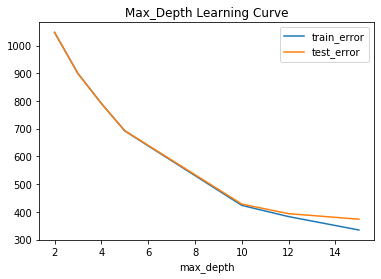

In [75]:
# Plot Max_Depth Learning Curve
max_depth_lc.plot(title="Max_Depth Learning Curve")

<b>Examine n_estimators</b>

In [76]:
results = []
# Enumerate through different max_depth values and store results
for n_estimators in [50,100,150,200]:
    rfr = RandomForestRegressor(max_depth = 12,n_estimators=n_estimators)
    rfr.fit(X_train, y_train)
    results.append(
        {
            'n_estimators': n_estimators,
            'train_error': metrics.mean_squared_error(y_train, rfr.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, rfr.predict(X_test))
        })
    
# Display Results
n_estimators_lc = pd.DataFrame(results).set_index('n_estimators').sort_index()
n_estimators_lc

,train_error,test_error
n_estimators,,
50,383.021303,393.424938
100,382.592339,393.114985
150,382.604242,393.113239
200,382.626578,393.143285


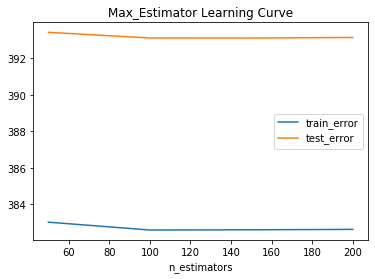

In [77]:
n_estimators_lc.plot(title="Max_Estimator Learning Curve")

In [79]:
import sklearn.metrics as metrics
results = []
# Enumerate through different max_depth values and store results
for max_features in [0.2,0.25,0.3,0.4]:
    clf = RandomForestRegressor(max_depth = 12,n_estimators=150,max_features=max_features)
    clf.fit(X_train, y_train)
    results.append(
        {
            'max_features': max_features,
            'train_error': metrics.mean_squared_error(y_train, clf.predict(X_train)),
            'test_error': metrics.mean_squared_error(y_test, clf.predict(X_test))
        })
    
# Display Results
max_features_lr = pd.DataFrame(results).set_index('max_features').sort_index()
max_features_lr

,train_error,test_error
max_features,,
0.20,385.802879,397.362498
0.25,380.114805,391.508907
0.30,375.732644,387.035372
0.40,373.182676,384.334174


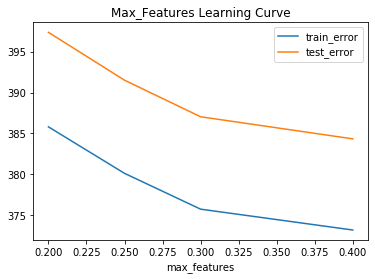

In [80]:
max_features_lr.plot(title="Max_Features Learning Curve")

In [81]:
#Multiple models were fit based on the learning curves. Hyperparameters were hand tuned.
rfr_new = RandomForestRegressor(n_estimators=150, n_jobs=2, max_depth=12, min_samples_split=60,max_features=0.8, verbose=0)
model_new_rfr = rfr_new.fit(X_train,y_train)
pred_new_rfr = model_new_rfr.predict(X_test)

In [82]:
print("MSE is ",mean_squared_error(pred_new_rfr,y_test))

MSE is  387.2963929290433


In [84]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=0)
model2 = gbm.fit(X_train,y_train)
pred2 = model2.predict(X_test)

In [85]:
print("MSE is ",mean_squared_error(pred2,y_test))

MSE is  357.81870742123294


In [253]:
feature_importance = pd.DataFrame(gbm.feature_importances_,
                                   columns=['importance'])
feature_importance['features']=X.columns
#feature_importance.sort_values(by=['importance'],ascending=False,inplace=True)
#print("GradientBoostingRegression:\n", feature_importance)
feature_importance

,importance,features
0,0.186248,yearsExperience
1,0.129483,milesFromMetropolis
2,0.107090,degree_OE
3,0.118669,industry_OE
4,0.000446,Major_BIOLOGY
5,0.003916,Major_BUSINESS
6,0.000342,Major_CHEMISTRY
7,0.000170,Major_COMPSCI
8,0.005578,Major_ENGINEERING
9,0.002291,Major_LITERATURE


In [287]:
#get the sum of feature importance of all job types
job = feature_importance[feature_importance['features'].str.contains("Job")].sum()
job
#convert the padass series to a dataframe
job_df =job.to_frame()
job_df
#transpose the df
transpose_job = job_df.T
transpose_job

,importance,features
0,0.419227,Job_CEOJob_CFOJob_CTOJob_JANITORJob_JUNIORJob_...


In [288]:
major = feature_importance[feature_importance['features'].str.contains("Major")].sum()
major
major_df =major.to_frame()
major_df
transpose_major = major_df.T
transpose_major

,importance,features
0,0.0392839,Major_BIOLOGYMajor_BUSINESSMajor_CHEMISTRYMajo...


In [266]:
degree = feature_importance[feature_importance['features'].str.contains("degree")] 
print(degree) 

   importance   features
2     0.10709  degree_OE


In [279]:
years = feature_importance[feature_importance['features'].str.contains("yearsExperience")] 
years

,importance,features
0,0.186248,yearsExperience


In [269]:
miles = feature_importance[feature_importance['features'].str.contains("milesFromMetropolis")] 
miles

,importance,features
1,0.129483,milesFromMetropolis


In [309]:
industry = feature_importance[feature_importance['features'].str.contains("industry")] 
industry

,importance,features
3,0.118669,industry_OE


Merge all the dataframes into one.

In [316]:
vertical_stack = pd.concat([transpose_job,transpose_major,degree,years,miles,industry], axis=0).reset_index(drop=True)

In [317]:
vertical_stack.sort_values(by= ["importance"],ascending = False)

,importance,features
0,0.419227,Job_CEOJob_CFOJob_CTOJob_JANITORJob_JUNIORJob_...
3,0.186248,yearsExperience
4,0.129483,milesFromMetropolis
5,0.118669,industry_OE
2,0.10709,degree_OE
1,0.0392839,Major_BIOLOGYMajor_BUSINESSMajor_CHEMISTRYMajo...


Based on the analyses we can recommend years of experience and location highly influence the salary. 